# Analysis of GDP, Income, Price by states and by different areas

The purpose of this project is to analyze GDP of each states, income(population income and per capita income), expenditure, regional price parities. I choose this economics topic because I want to be more familiar with income patterns, spending patterns in different states and was curious about the insights. On top of that, GDP, income and expenditure are always the burning issue of Economics. To start the project, I came up with complex datasets and filtered them and found some insights from them. This project is specially looking which states are growing over the years (like 10 years), which industry in that state is blooming? What does that mean to us? In addition, I also want to analyze which state has been at the top when comparing by personal income and by area. This project, further compares the personal income with personal expenditure. It also compares per capita expenditure with per capita income by states. Moreover, this project highlights the expenditure pattern of top states with high spending rate over the years. Moving along, this project finds specific area where the common pattern of spending is seen for top 4 states and analyzed the Regional Price Parities. Finally, with all the insights, the project attempts to find the co-relation with state's GDP and state's RPP.

Doing so, I have imported all of my data from BEA's website. And most importantly, while comparing these measures by states, I have included District of Colombia (DC) in my comparison.

To accomplish the project, I had to come up with certain procedures and steps. 
1. Importing Pakages and libraries
2. Importing files and folders
3. Filtering Data and Processing
4. Visualization and Analysis

# Importing libraries and packages

In [ ]:
import pandas as pd

#pip install jupyter_plotly_dash

import zipfile
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

import plotly
import plotly.express as px
import plotly.offline as pyo              #with this I will be able to plot charts offline
import plotly.graph_objects as go            #using plotly graph objects


from scipy import stats                 #to use statistical calculations

import dash                                 #enables to build interactive web based applications (charts, graphs)
from jupyter_plotly_dash import JupyterDash   #enables to run dash from jupyter
import dash_core_components as dcc            # to create graph in our layout 
import dash_html_components as html            # to generate html components and use them
from dash.dependencies import Input, Output      #to make the dash apps interactive

from IPython.display import display
plotly.offline.init_notebook_mode()


In [ ]:
def extract_zipfile(file):                        #extracting downloaded zipfiles
    with zipfile.ZipFile(file,'r') as zip_r:
        zip_r.extractall()
    extract = zip_r.namelist()
    return extract

## Reading files

In [ ]:
#reading annual personal income and employment file
file='SAINC Annual Personal Income and Employment By State.zip'
zip_read_api = extract_zipfile(file)

In [206]:
income_state_employment_df_all=pd.read_csv('SAINC5N__ALL_AREAS_1998_2019.csv')
#reading another consumer expenditure file
file='SAEXP Personal Consumption Expediture by State.zip'
zip_read_pc = extract_zipfile(file)

personal_expend_abs_all=pd.read_csv("SAEXP1__ALL_AREAS_1997_2019.csv")
personal_expend_abs_all

personal_expend_percapita_all = pd.read_csv('SAEXP2__ALL_AREAS_1997_2019.csv')
personal_expend_percapita_all

#reading another GDP file
file='SAGDP Annual GDP by state.zip'
zip_read_agdp = extract_zipfile(file)

percent_change_gdp_all= pd.read_csv('SAGDP11N__ALL_AREAS_1998_2019.csv')
GDP_million_dollars_all = pd.read_csv('SAGDP2N__ALL_AREAS_1997_2019.csv')
GDP_thousand_dollars_all=pd.read_csv('SAGDP3N__ALL_AREAS_1997_2019.csv')

#reading another file


buying_power_state= pd.read_excel("RPP.xlsx", sheet_name = 'Sheet2')

buying_power_state


,GeoFips,GeoName,LineCode,Description,1998,1999,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,01998,Alabama (Metropolitan Portion),1.00,RPPs: All items,89.10,89.30,89.50,89.10,89.20,89.40,...,89.40,89.20,88.90,89.10,88.70,88.20,88.00,87.10,87.20,87.60
1,01998,Alabama (Metropolitan Portion),2.00,RPPs: Goods,97.90,98.10,98.30,97.90,98.00,98.20,...,98.40,97.50,97.30,97.40,97.30,97.50,97.80,97.30,97.30,97.30
2,01998,Alabama (Metropolitan Portion),3.00,RPPs: Services: Rents,68.10,68.30,68.50,68.10,68.20,68.40,...,68.80,67.80,67.00,67.70,67.10,67.30,66.40,66.30,66.50,65.00
3,01998,Alabama (Metropolitan Portion),4.00,RPPs: Services: Other,94.40,94.60,94.80,94.40,94.50,94.70,...,94.30,93.90,94.10,94.00,93.90,93.30,93.30,91.80,91.70,91.50
4,01999,Alabama (Nonmetropolitan Portion),1.00,RPPs: All items,81.00,81.20,81.40,81.00,81.10,81.30,...,80.50,83.10,82.90,83.50,83.50,82.20,81.80,81.40,81.20,80.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,56999,Wyoming (Nonmetropolitan Portion),2.00,RPPs: Goods,99.40,99.60,99.80,99.40,99.50,99.70,...,99.40,99.20,98.60,98.60,98.90,99.90,100.80,98.80,98.80,98.90
406,56999,Wyoming (Nonmetropolitan Portion),3.00,RPPs: Services: Rents,83.70,83.90,84.10,83.70,83.80,84.00,...,87.90,88.00,90.00,89.20,86.70,89.80,88.80,90.50,81.80,78.20
407,56999,Wyoming (Nonmetropolitan Portion),4.00,RPPs: Services: Other,96.80,97.00,97.20,96.80,96.90,97.10,...,94.90,94.50,93.70,92.60,93.30,93.60,92.70,92.90,92.80,92.50
408,Legend / Footnotes:,NaN,nan,NaN,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


## Filtering and droping NANs

In [165]:
#removing Nan values fromt the dataframes
income_state_employment_df_all=income_state_employment_df_all.dropna()
personal_expend_percapita_all = personal_expend_percapita_all.dropna()  #per capita individual expenditure in different criterias

percent_change_gdp_all=   percent_change_gdp_all.dropna()#gdp change in different criteria by state
#GDP_million_dollars_all 
GDP_thousand_dollars_all =GDP_thousand_dollars_all.dropna()

pd.options.display.float_format='{:.2f}'.format  #displays all the data values in two decimal places
percent_change_gdp_all


,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,"""00000""",United States *,,SAGDP11N,1.00,...,All industry total (percent change),Percent change,4.50,4.80,...,2.60,1.60,2.20,1.80,2.50,3.10,1.90,2.60,3.20,2.40
1,"""00000""",United States *,,SAGDP11N,2.00,...,Private industries,Percentage points,4.15,4.49,...,2.21,1.47,2.14,1.63,2.51,3.05,1.59,2.20,2.82,2.07
2,"""00000""",United States *,,SAGDP11N,3.00,11,"Agriculture, forestry, fishing and hunting",Percentage points,-0.03,0.03,...,-0.03,-0.04,-0.04,0.18,0.01,0.08,0.05,-0.02,0.04,0.00
3,"""00000""",United States *,,SAGDP11N,4.00,111-112,Farms,Percentage points,-0.03,0.02,...,-0.03,-0.04,-0.05,0.19,0.01,0.07,0.04,-0.02,0.03,-0.01
4,"""00000""",United States *,,SAGDP11N,5.00,113-115,"Forestry, fishing, and related activities",Percentage points,0.00,0.01,...,0.00,0.00,0.01,-0.01,0.00,0.01,0.00,0.00,0.00,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5515,"""98000""",Far West,8,SAGDP11N,88.00,"42, 44-45",Trade,Percentage points,1.27,0.56,...,0.50,0.30,0.11,0.43,0.51,0.70,0.10,0.51,0.11,0.23
5516,"""98000""",Far West,8,SAGDP11N,89.00,...,Transportation and utilities,Percentage points,0.04,0.17,...,0.31,0.08,0.02,0.06,0.02,0.13,0.28,0.23,0.17,0.28
5517,"""98000""",Far West,8,SAGDP11N,90.00,...,Manufacturing and information,Percentage points,2.35,3.37,...,0.51,-0.05,0.36,1.68,1.02,1.61,1.07,1.48,1.22,1.04
5518,"""98000""",Far West,8,SAGDP11N,91.00,...,Private goods-producing industries 2/,Percentage points,1.55,2.11,...,-0.69,-0.64,0.55,0.66,0.65,0.94,0.42,0.58,0.70,0.30


In [ ]:
#looking over all the dataframes we have
income_state_employment_df_all
personal_expend_percapita_all
percent_change_gdp_all
GDP_thousand_dollars_all
buying_power_state

# 1. Analysis of  GDP of US states

In [ ]:
#printing 200 rows to have a look
percent_change_gdp_all.head(200)

In [ ]:
#creating filter function to drop, rename the dataframes 
def filter(x):
    x_drop = x.drop(['GeoFIPS','Region','Unit','TableName','LineCode',
                                                               'IndustryClassification'], axis=1)
    years =  x_drop.iloc[:,2:13]
    x_filter= x_drop.drop(years, axis=1)
    x_filter =x_filter.rename(columns={"GeoName":"States"})
    
    return x_filter

In [ ]:
#lets analyze the state's GDP; to do that we need to filter this table

#calling filter function
    
GDP_state_df=filter(x = percent_change_gdp_all)   

In [ ]:
# looking for specific rows 
GDP_state_df_change= GDP_state_df.loc[GDP_state_df.Description == 
                                                      'All industry total (percent change)']

GDP_state_df_change

areas = ['United States *','New England','Mideast','Great Lakes','Plains','Southeast','SouthWest', 'Rocky Mountain','Far West',
         'Southwest']
# limiting the dataframe to 50 states and DC using for loops
for area in areas:
    GDP_state_df_change = GDP_state_df_change.loc[GDP_state_df_change.States != area]

In [ ]:
#calculating mean of the dataframe
GDP_state_df_change_mean = GDP_state_df_change.mean(axis = 1)
#converting calculated mean column to list
GDP_state_df_mean= GDP_state_df_change_mean.tolist()
#adding a new column with list of mean values
GDP_state_df_change['Mean of %change-GDP'] = GDP_state_df_mean

#GDP_state_df_change  (prints the dataframe)

In [ ]:
# FILTERINg table to plot using cholropleth maps

#creating a list of 50 state names and DC
state_name= ['AL', 'AK','AZ','AR', 'CA','CO','CT','DE','DC','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA',
             'MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX',
             'UT','VT','VA','WA','WV','WI','WY']

GDP_state_df_change['state_name'] = state_name #adding a NEW column with a list
#selecting particular columns from df
GDP_state_df_change_Plot = GDP_state_df_change.loc[:,['States','state_name','2009','2019','Mean of %change-GDP']]


## 1.a Which state has increased its average GDP from 2009-2019?

In [ ]:

#using plotly to plot

fig = go.Figure(data=go.Choropleth( #using graph objects
    locations=GDP_state_df_change_Plot['state_name'], # Spatial coordinates
    z = GDP_state_df_change_Plot['Mean of %change-GDP'].astype(float), # Data to be color-coded
    locationmode= 'USA-states', # set of locations match entries in locations
    colorscale = 'Blues',
    colorbar_title = "% change in GDP",
    hoverinfo='location+z'
))

fig.update_layout(  #update figure's layout proporties 
    title_text = 'Average Change in US states GDP by State by all industries from 2009-2019 ',
    geo_scope='usa', # limite map scope to USA
    template='plotly_dark',
    annotations = [dict(
        x=0.90,
        y=0.05,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://www.bea.gov/data/gdp/gross-domestic-product.html">GDP BEA </a>',
        showarrow = False)]
)

fig.show()

In [ ]:
# sorting values to ge top 20 states according to their mean of percent change, so we need to sort the column in descending order
Top_20_states = GDP_state_df_change.sort_values(by=['Mean of %change-GDP'], ascending=False)
# Now let's find Top 10 states according to their mean of percent change, so we need to sort the column in descending order
Top_20_states_df=Top_20_states.loc[:,['States','Mean of %change-GDP']][:20] #getting top 20 states to plot

#Top_20_states_df (printing the dataframe)


## What are top 20 states that have increased their averaged GDP in all industries?

In [ ]:

#plotting top 20 states in average increase of GDP from 2009-2019
fig = px.bar(Top_20_states_df, y='Mean of %change-GDP', x='States', text='Mean of %change-GDP') #plotly bar function
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',title_text = 'top 20 states in average increase of GDP from 2009-2019 in all areas')
fig.show()

After we saw top 20 states according to increase in their Gdp over the years in different areas, but first lets start with overview of top growing state in 2019 in all industries. Which industry is growing fastest in 2019 by STATE?

In [ ]:
#USING filter function to filter this new dataframe
GDP_states = filter(x= GDP_thousand_dollars_all)
#GDP_states  #prints out the dataframe

In [ ]:
#setting list of areas
areas = ['United States *','New England','Mideast','Great Lakes','Plains','Southeast','SouthWest', 'Rocky Mountain','Far West',
         'Southwest']
#getting data of 50 states and DC 
for area in areas:
    GDP_states = GDP_states.loc[GDP_states.States != area]
    
GDP_states #prints out the data frame

#getting a view of How Alabama data looks like with all the industry areas
each_state = GDP_states.loc[GDP_states.States == 'Alabama']    
GDP_states

In [ ]:
# therea are many industries as you can see in the table data having subdivisions into each industry, 
#so to come up with popoular areas we need to filter the Description column 
items = list(each_state.Description)
items

#creating some new lists
main=[]
main2=[]
main3=[]
main4=[]

#the data had 4 sub-groups inside the groups; 
#the subgroups were indented so used for loop to classify the data according to their subgroups
for item in items: 
    print(item)
    count =0
    for i in item:
        print(ord(i))
        if ord(i) <= 32:
            count += 1
        else:
            break

    print(count)
    #making new list to group them according to their sub-groups.
    if count == 1:
        main.append(item)
    elif count ==2:
        main2.append(item)
    elif count ==3:
        main3.append(item)
    else:
        main4.append(item)


In [ ]:
# main 3 was the list of popular areas so retrieving data of all the df by those areas.
area3_df =pd.DataFrame()   #making a new dataframe
for i in main3:          #using a for loop to get the new dataframe
    each_area3 = GDP_states.loc[GDP_states.Description == i]
   
    area3_df = area3_df.append(each_area3)


#area3_df.head(150)    #priting 150 rows of this new dataframe

In [ ]:
#Now I would like to see which state is the most growing state on basis of GDP of all industries in 2019.

# getting specific rows from the dataframe for 2019 after sorting values in descending order in 2019 column
all_state = GDP_states.loc[GDP_states.Description == 'All industry total']
all_state_2019 = all_state.loc[:,['States','Description','2019']].sort_values(by=['2019'], ascending = False)

# getting specific rows from the dataframe for 2018 after sorting values in descending order in 2019 column
all_state_2018 = all_state.loc[:,['States','Description','2018']].sort_values(by=['2018'], ascending = False)
#all_state_2018  #prints out the dataframe

all_state_2019   #prints out the dataframe

rank_list=[]
for no in range(1,52):
    rank_list.append(no)
    
all_state_2019['Rank']=rank_list
all_state_2019

Would like to know Which state has highest gdp from all industries in 2019?

In [ ]:
#using plotly table feature to have data presented in tabular format
fig_tab = go.Figure(data=[go.Table(  #calls graph objects of plotly in tabular form
    header=dict(values=['Rank','States','Description','2019-GDP'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[all_state_2019.Rank,all_state_2019.States, all_state_2019.Description, all_state_2019['2019']],
               fill_color='lavender',
               align='left'))
])
fig_tab.update_layout(  #update figure's layout proporties 
    title_text = 'State Ranking by GDP from all industries in 2019 '
)

fig_tab.show()

In [ ]:
#Carlifornia being the top most growing state in US on bais of GDP of all industries in 2019, 
#lets see which industries contribute more in CA

#accessing specifc rows and ordering them in descending order to see top indusitries fo CA in 2019
top_industry_CA = area3_df.loc[area3_df.States == 'California'].sort_values(by=['2019'], ascending = False)
top_industry_CA



In [ ]:

#getting specific columns to plot in plotly pie-chart
sum_val_2019 = top_industry_CA['2019']
sum_val = sum(sum_val_2019[11:])

#getting specific rows and columns using iloc
top_industry_CA_lim = top_industry_CA.iloc[[0,1,2,3,4,5,6,7,8,9,10],[0,1,13]]

#creating a dictionary to make a new row
new_row = {'States':'California', 'Description':'Rest-areas', '2019':sum_val}

#append row to the dataframe
top_industry_CA_lim = top_industry_CA_lim.append(new_row, ignore_index=True)


#calculating sum for the column of the dataframe
total_sum = sum(top_industry_CA_lim['2019'])

#using for loop to convert the data into percentage format
for i in range(len(top_industry_CA_lim['2019'])):
    top_industry_CA_lim.iloc[i,2] = (top_industry_CA_lim.iloc[i,2]/total_sum) *100
    



In [ ]:
# plotting data in plotly pie-chart

lab =top_industry_CA_lim['Description']
val = top_industry_CA_lim['2019']

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=lab, values=val, hole=.3)])

fig.update_layout(
    title_text="GDP generated in California according to areas",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='CA', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

#Real estate and rental leasing is top industry among other industries that contribute more.



# 2. Analysis of income by state

In [ ]:
#income_state_employment_df_all   #printing dataframe for overvies
 

In [ ]:
#lets filter this dataframe by dropping some unwanted columns
income_state_df_filter = income_state_employment_df_all.drop(['GeoFIPS','Region','Unit','TableName',
                                                       'LineCode','IndustryClassification'], axis=1)

income_state_df_filter


In [ ]:
#lets see the personal income and per capita income of US from 2009 to 2019
years =  income_state_df_filter.iloc[:,2:13]  #getting specific columns
personal_income = income_state_df_filter.drop(years, axis=1)  #dropping specific columns
personal_income_states =personal_income.rename(columns={"GeoName":"States"})  #renaming columns
personal_income_states

In [ ]:


#using function and loop to get 50 states and DC
def remove_places(dataf):
    areas = ['United States','New England','Mideast','Great Lakes','Plains','Southeast','SouthWest',
             'Rocky Mountain','Far West','Southwest']
    new_dataf=pd.DataFrame()
    for area in areas:
        dataf = dataf.loc[dataf.States != area]
        
        
    return dataf

personal_income_state = remove_places(dataf =personal_income_states) #calling a function


In [ ]:
#getting specific rows
state_personal_income= personal_income_state.loc[personal_income_state.Description == 
                                                      'Personal income (thousands of dollars)']
#state_personal_income #printing the dataframe


In [ ]:
state_personal_income_plot = state_personal_income.drop(['Description'], axis =1) #dropping columns

#making a list of states name to new dataframe
state_name= ['AL', 'AK','AZ','AR', 'CA','CO','CT','DE','DC','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA',
             'MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX',
             'UT','VT','VA','WA','WV','WI','WY']

state_personal_income_plot['code'] = state_name  #adding a new column
state_personal_income_plot


In [ ]:
# plotting "state_personal_income dataframe" using dash and plotly components
app = dash.Dash(__name__)   #setting the app variable
app.layout = html.Div([      #setting app layout using html components

    html.H1("Compare personal income in different states", style={'text-align': 'center'}),  #specifying header

    dcc.Dropdown(id="year",  #having dropdown menu
                 options=[
                     {"label": "2009", "value": '2009'},
                     {"label": "2010", "value": '2010'},
                     {"label": "2011", "value": '2011'},
                     {"label": "2012", "value": '2012'},
                     {"label": "2013", "value": '2013'},
                     {"label": "2014", "value": '2014'},
                     {"label": "2015", "value": '2015'},
                     {"label": "2016", "value": '2016'},
                     {"label": "2017", "value": '2017'},
                     {"label": "2018", "value": '2018'}],
                 multi=False,
                 value='2018',                   #setting default value 
                 style={'width': "40%"}
                 ),


    html.Div(id='out_field', children=[]),  #specifying dropdown container
    html.Br(),  #leaving a line in html

    dcc.Graph(id='state_map', figure={})  #calling graph 

])

# Connect the Plotly graphs with Dash Components
@app.callback(
    [Output(component_id='out_field', component_property='children'), #calling for output of container with user optin
     Output(component_id='state_map', component_property='figure')],  #calling for output of container with map
    [Input(component_id='year', component_property='value')]  #input call with year and respective values
)
def update_graph(user_yr):  #defining function to update graph using the user's input
    print(user_yr)
    print(type(user_yr))

    container = "you will see the data for: ".format(user_yr)
    
    df = state_personal_income_plot.sort_values(by=[user_yr], ascending=False) #makina new df according to user input
    df[user_yr] = df[user_yr].astype(float) #converting data type of user selected to float to make colorscale continuous
    print(df)
    

    # using Plotly Express
    
    
    fig = px.choropleth(
        data_frame=df,
        locationmode='USA-states',
        locations=df['code'],
        scope="usa",
        color= user_yr,
        hover_data=['States', user_yr],                           #setting the hover info
        color_continuous_scale=px.colors.sequential.Bluered,
        labels={user_yr: 'Personal income in billions'},           
        template="plotly_dark"                              #setting the theme
    )
    

    return container, fig      #this returns the value of output we needed

In [ ]:
if __name__ == '__main__':
    app.run_server(port =9999) #calling specific port to run the server

In [ ]:
# lets get some popular areas to compare which area is holding main income of that states.
ND_annual_income = personal_income_state.loc[personal_income_state.States == 'North Dakota']
# lets get some popular areas to compare which area is holding main income of that states.
list_desc = ND_annual_income.Description.tolist()
list_desc   #prints out the list of areas that we have


##Now we have a list of different areas lets get some popular areas from the list to compare the income by these areas. So some of the popular areas are:
1. Wages and salaries
2. forestry and fishing
3. Mining
4. Retail Trade
5. Manufacturing
6. Transportation and Warehousing
7. Information
8. Real estate and rental and leasing
9. Accommodation and food services
10. Government and government enterprises.

In [ ]:
#finding which state residents is gaining more income in specific areas 
#this can show the possibilities in that state for that area like number of jobs openings

def compare_states(y):  #defining a function
    compare_area_states = personal_income_state.loc[personal_income_state.Description == y]  #accessing specifc rows
    comp_area_states = compare_area_states.copy()   #making a copy to new dataframe
    comp_area_states['2019'] = comp_area_states['2019'].apply(pd.to_numeric)  #converting data type of the column
    comp_area_states_filt = comp_area_states.sort_values('2019', ascending =False).iloc[:10,[0,-1]] #sorting values and acessing specific rows and columns
    return comp_area_states_filt



In [ ]:
#defining a function to plot barchart using plotly
def draw_plot(df,a,x, title):
    tit_text = title + a
    df = df.rename(columns={'2019':'Income in millions'})
    a = 'Income in millions'
    fig = px.bar(df, y=a, x=x, text=a, color='States') #plotly bar function
    fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
    fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',title_text = tit_text)
    fig.show()
    


In [ ]:
# looking for states with high wages and salaries
comp_wage_sal = compare_states(y=' Wages and salaries')
draw_plot(df = comp_wage_sal,a='2019',x='States',title = 'Top 10 states according to wages and salaries in ')



In [ ]:
# calling function to compare income based on retail trade to other states
comp_retail_trade = compare_states(y= '   Retail trade',)
draw_plot(df = comp_retail_trade,a='2019',x='States',title = 'Top 10 states(income) based on retail trade in ')


In [ ]:
# calling function to compare income based on manufacturing to other states
comp_manufacturing = compare_states(y= '   Manufacturing')
draw_plot(df = comp_manufacturing,a='2019',x='States',title = 'Top 10 states(income) based on manufacturing trade in ')


In [ ]:
# calling function to compare income based on transport to other states
comp_transp = compare_states(y= '   Transportation and warehousing')
draw_plot(df = comp_transp,a='2019',x='States',title = 'Top 10 states(income) based on based on transport in ')

In [ ]:
# calling function to compare income based on information to other states
comp_info = compare_states(y= '   Information')
draw_plot(df = comp_info,a='2019',x='States',title = 'Top 10 states(income) based on based on information in ')

In [ ]:
# calling function to compare income based on real estate to other states
comp_real_estate = compare_states(y= '   Real estate and rental and leasing')
draw_plot(df = comp_real_estate,a='2019',x='States',title = 'Top 10 states(income) based on based on real estate in ')

In [ ]:
# calling function to compare income based on food and accomodation to other states
comp_food = compare_states(y= '   Accommodation and food services')
draw_plot(df = comp_food,a='2019',x='States',title = 'Top 10 states(income) based on based on accomodation and food services in ')

In [ ]:
# calling function to compare income based on government areas to other states
comp_gov = compare_states(y= '  Government and government enterprises')
draw_plot(df = comp_gov,a='2019',x='States',title = 'Top 10 states(income) based on based on government enterprises in ')

# 3. Analysis of Inflation

In [103]:

personal_expend_percapita_all #glancing over the new dataframe for analysis of inflation

#calling filter function to filter the dataframe

get_inflation= filter(x = personal_expend_percapita_all)
personal_expend_percapita_all

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,"""00000""",United States,,SAEXP2,1.00,...,Per capita personal consumption expenditures,Dollars,20298.00,21295.00,...,32903.00,34124.00,35044.00,35790.00,37118.00,38331.00,39521.00,41028.00,42802.00,44276.00
1,"""00000""",United States,,SAEXP2,2.00,...,Goods,Dollars,7349.00,7633.00,...,10699.00,11261.00,11563.00,11779.00,12111.00,12212.00,12359.00,12817.00,13351.00,13712.00
2,"""00000""",United States,,SAEXP2,3.00,...,Durable goods,Dollars,2624.00,2825.00,...,3391.00,3510.00,3646.00,3764.00,3902.00,4078.00,4181.00,4341.00,4535.00,4674.00
3,"""00000""",United States,,SAEXP2,4.00,...,Motor vehicles and parts,Dollars,1075.00,1161.00,...,1114.00,1172.00,1264.00,1321.00,1389.00,1483.00,1504.00,1550.00,1602.00,1590.00
4,"""00000""",United States,,SAEXP2,5.00,...,Furnishings and durable household equipment,Dollars,589.00,629.00,...,779.00,792.00,809.00,834.00,868.00,918.00,958.00,999.00,1051.00,1089.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,"""98000""",Far West,8,SAEXP2,20.00,...,Financial services and insurance,Dollars,1853.00,1993.00,...,2520.00,2625.00,2673.00,2788.00,2933.00,3083.00,3168.00,3355.00,3564.00,3725.00
1436,"""98000""",Far West,8,SAEXP2,21.00,...,Other services,Dollars,1622.00,1730.00,...,2739.00,2815.00,2906.00,2895.00,3029.00,3136.00,3278.00,3447.00,3650.00,3902.00
1437,"""98000""",Far West,8,SAEXP2,22.00,...,Final consumption expenditures of nonprofit ...,Dollars,346.00,372.00,...,958.00,1020.00,1137.00,1188.00,1224.00,1299.00,1413.00,1483.00,1544.00,1560.00
1438,"""98000""",Far West,8,SAEXP2,23.00,...,Gross output of nonprofit institutions,Dollars,1758.00,1824.00,...,3754.00,3951.00,4249.00,4359.00,4492.00,4759.00,5035.00,5244.00,5499.00,5748.00


In [105]:

# seeing national per capita expenditure from 2008 to 2019
get_inflation_US = get_inflation.iloc[0].drop(['States'])  #accessing specifc rows 

#SEEIG national per capita personal income
income_state_df_filter_us = income_state_df_filter.iloc[2]
income_state_df_filter_usa = income_state_df_filter_us.drop(['GeoName','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007'])

#making a new dataframe with concating above dataframes to compare per capita income and per capita expend 
new_df_comp = pd.concat([get_inflation_US,income_state_df_filter_usa],axis=1)
new_header = new_df_comp.iloc[0] #accesing a row
new_df_comp = new_df_comp[1:] 
new_df_comp.columns = new_header #making a column as a new header
new_df_comp = new_df_comp.rename(columns={'Per capita personal consumption expenditures':'Per_capita_expend',
                               'Per capita personal income (dollars) 3/':'Per_capita_income'})

new_df_comp #printing new df


Description,Per_capita_expend,Per_capita_income
2008,32781.00,40904
2009,32054.00,39284
2010,32903.00,40547
2011,34124.00,42739
2012,35044.00,44605
2013,35790.00,44860
2014,37118.00,47071
2015,38331.00,49019
2016,39521.00,50015
2017,41028.00,52118


In [106]:
#plotting scatter plot using plotly
col_1 = go.Scatter(                        #using plotly scatter to variable
    x =new_df_comp.index,
    y= new_df_comp.Per_capita_expend,
    mode ='lines+markers',                     #sets the type of lines and dots in the plot
    name ='Per_capita_expend'                    # sets the name of the line plot
)

col_2 = go.Scatter(                             #using plotly scatter to variable
    x = new_df_comp.index,
    y= new_df_comp.Per_capita_income,
    mode ='lines+markers',                     #sets the type of lines and dots in the plot
    name ='Per_capita_income'                   # sets the name of the line plot
)

graph_s = [col_1,col_2]            #making a list of these scatterplot variables
layout = go.Layout(                   #using plotly graph objects layout
   title='Comparison of per capita expend and per capita income of US by year',  #setting up the title
   xaxis=dict(
        title='Year'
   ),
   yaxis=dict(
       title='US dollars(thousands)'
   ),
)
fig = go.Figure(data=graph_s, layout=layout)            #calling for the scatter plot figure
plotly.offline.iplot(fig)  #using offline feature of plotly



###### The per capita spending in US from 2008 has increased constantly. I would like to see which state's residents spending rate is  at the most.

In [ ]:
#calling remove_places function to get 50 states and DC
get_inflation =remove_places(get_inflation)
#get_inflation                                #prints out the filtered dataframe

In [ ]:
#Analyzing spending rate of each person in each states

#getting specific rows
per_capita_spend = get_inflation.loc[get_inflation.Description == 'Per capita personal consumption expenditures']
spend_per_capita= per_capita_spend.drop(['2008'], axis = 1) #dropping 2008 column, as we are only comparing from 2009
#calculating percentage and adding it as a new column
spend_per_capita['spending_rate %'] = 100 *((spend_per_capita['2019'] - spend_per_capita['2009']) / spend_per_capita['2009'])



In [ ]:
#finding top 10 states that have increased per capita spending rate with sorting functionality

top_spend_per_capita = spend_per_capita.sort_values(by=['spending_rate %'], ascending =False)[:10]


#this shows that each residents of California spending rate in 2019 has increased by 48%than 2009. 

#selecting specific columns and making it as new df
top_spend_per_capita_df = top_spend_per_capita.loc[:,['States','spending_rate %']]

In [ ]:
colors=['maroon', 'lightsalmon', 'aqua', 'aquamarine', 'greenyellow', 'mediumvioletred', 'bisque', 'lightpink', 'darkorange', 'blue']
a=list(top_spend_per_capita_df['spending_rate %'])

    
fig = go.Figure(data=[go.Bar(
    x=top_spend_per_capita_df['spending_rate %'],
    y=top_spend_per_capita_df['States'],
    hovertext=['spending_rate %', 'States'],
    orientation='h',
    text=a,
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig.update_layout(title_text='Top 10 states with highest spending rate in 2019.',
                  yaxis=dict(title='states',titlefont_size=16),
                 xaxis=dict(title='%change',titlefont_size=16))


fig.show()

Now we have top 3 states whose residents have increased their spending ratio from 2009, lets analyze the share of their expenditure in popular areas.

#### Let's see states residents spend the most on which area

In [ ]:
#Similarly all states have their own pattern of spending
def state_patt(state, year):
    spend_per_capita_state= get_inflation.set_index(['States'])
    spend_per_capita_state =spend_per_capita_state.loc[[state],['Description',year]]
    new_spend_state = spend_per_capita_state.reset_index()
    renew_spend_state = new_spend_state.set_index(['Description'])
    final_spend_state = renew_spend_state.drop(['Per capita personal consumption expenditures',' Goods',
                '  Durable goods','  Nondurable goods',' Services','  Household consumption expenditures (for services)'])
    final_spend_state = final_spend_state.sort_values(by=[year], ascending =False)
    return final_spend_state

In [ ]:
spend_state = state_patt(state='California', year ='2019')    #calling function
print(spend_state)
spend_state = state_patt(state='New York', year ='2019')          #calling a function
print(spend_state)
spend_state = state_patt(state='South Dakota', year ='2019')        #callinga function
print(spend_state)
spend_state = state_patt(state='Hawaii', year ='2019')          #calling a function
print(spend_state)
spend_state = state_patt(state='Utah', year ='2019')          #calling a function
print(spend_state)
spend_state = state_patt(state='Texas', year ='2019')            #calling a function
print(spend_state)


From the dataset, it became clear that for year 2019, most of the states residents had similar pattern of spending 
the dollars. The top priorities were housing and utilites, health care and financial servics and insurance. So lets visualize these three areas for different states for 2009 and 2019.

In [ ]:
# to visualize I need to have new dataframe so creating a new df

def find_data(desc, state):  #defining function
    get_r =  get_inflation.loc[get_inflation.Description == desc]  #getting columns from specific rows
    get_state = get_r.loc[get_r.States == state]    #getting columns from specific rows
    get_value = get_state.iloc[:,[0,1,-1]]  #getting particular columns
    return get_value
                               
for_CA = find_data(desc = '   Housing and utilities',state= 'California')   # calling function for specific state in 2019                       
for_NY = find_data(desc = '   Housing and utilities',state= 'New York') # calling function for specific state in 2019
for_SD = find_data(desc = '   Housing and utilities',state= 'South Dakota')# calling function for specific state in 2019
for_TX = find_data(desc = '   Housing and utilities',state= 'Texas') # calling function for specific state in 2019


for_desc1 =  for_CA.append([for_NY,for_SD, for_TX]) #creating new df and appending above df to it

for_CA2 = find_data(desc = '   Health care',state= 'California') # calling function for specific state in 2019                          
for_NY2 = find_data(desc = '   Health care',state= 'New York') # calling function for specific state in 2019 
for_SD2 = find_data(desc = '   Health care',state= 'South Dakota')# calling function for specific state in 2019 
for_TX2 = find_data(desc = '   Health care',state= 'Texas')# calling function for specific state in 2019 

for_desc2 =  for_CA2.append([for_NY2,for_SD2,for_TX2]) #creating new df and appending above df to it

for_CA3 = find_data(desc = '   Financial services and insurance',state= 'California')# calling function for specific state in 2019                              
for_NY3 = find_data(desc = '   Financial services and insurance',state= 'New York')# calling function for specific state in 2019 
for_SD3 = find_data(desc = '   Financial services and insurance',state= 'South Dakota')# calling function for specific state in 2019 
for_TX3 = find_data(desc = '   Financial services and insurance',state= 'Texas')# calling function for specific state in 2019 

for_desc3 =  for_CA3.append([for_NY3,for_SD3, for_TX3])#creating new df and appending above df to it


one_df = for_desc1.append([for_desc2,for_desc3]) #creating new df and appending above df to it

one_df_ch =one_df.rename(columns={'2019':'Dollars spend'}) #renaming columns 
year=['2019'] *12 #making a list of values
one_df_ch['Year'] = year #adding columns with list values

In [ ]:
def find_data2(desc, state): #defining function
    get__r =  get_inflation.loc[get_inflation.Description == desc] #getting specific columns and rows
    get__state = get__r.loc[get__r.States == state] #getting specific columns by rows
    get__value = get__state.iloc[:,[0,1,3]] #getting particular columns
    return get__value
                               
for1_CA1 = find_data2(desc = '   Housing and utilities',state= 'California') # calling function for specific state in 2009                       
for1_NY1 = find_data2(desc = '   Housing and utilities',state= 'New York')# calling function for specific state in 2009 
for1_SD1 = find_data2(desc = '   Housing and utilities',state= 'South Dakota')# calling function for specific state in 2009 
for1_TX1 = find_data2(desc = '   Housing and utilities',state= 'Texas')# calling function for specific state in 2009 



for1_desc1 =  for1_CA1.append([for1_NY1,for1_SD1,for1_TX1]) #creating new df and appending above df to it

for2_CA2 = find_data2(desc = '   Health care',state= 'California')    # calling function for specific state in 2009                           
for2_NY2 = find_data2(desc = '   Health care',state= 'New York')# calling function for specific state in 2009 
for2_SD2 = find_data2(desc = '   Health care',state= 'South Dakota')# calling function for specific state in 2009 
for2_TX2 = find_data2(desc = '   Health care',state= 'Texas')# calling function for specific state in 2009 

for2_desc2 =  for2_CA2.append([for2_NY2,for2_SD2, for2_TX2]) #creating new df and appending above df to it

for3_CA3 = find_data2(desc = '   Financial services and insurance',state= 'California') # calling function for specific state in 2009                              
for3_NY3 = find_data2(desc = '   Financial services and insurance',state= 'New York')# calling function for specific state in 2009 
for3_SD3 = find_data2(desc = '   Financial services and insurance',state= 'South Dakota')# calling function for specific state in 2009 
for3_TX3 = find_data2(desc = '   Financial services and insurance',state= 'Texas')# calling function for specific state in 2009 


for3_desc3 =  for3_CA3.append([for3_NY3,for3_SD3,for3_TX3]) #creating new df and appending above df to it


two_df = for1_desc1.append([for2_desc2,for3_desc3])#creating new df and appending above df to it

two_df

two_df_ch =two_df.rename(columns={'2009':'Dollars spend'}) #renaming columns
year=['2009'] *12
two_df_ch['Year'] = year # adding columns to dataframe


two_df_ch  #prints the new dataframe



In [ ]:
final_df = one_df_ch.append(two_df_ch) #appending two dataframes to make it one
final_df

#plotting bar chart from plotly
fig = px.bar(final_df, x="States", y="Dollars spend", color="Description", barmode="group", facet_col="Year",
             category_orders={"States": ["California", "New York", "South Dakota"],
                              "Description": ['   Housing and utilities','   Financial services and insurance','   Health care'],
                              "Year": ["2019", "2009"]})
fig.show()


The visualization shows that the spending rate has obviously increased in all 4 compared states. In addition, like 2009 these states residents have similar pattern of spending today too. In addition, if you see in the left plot for 2009 you will be able to visualize that California residents spend more than other 4 states in housing and utilites. So i would like to see if it is because the living cost and rental costs is high.

## 4. Analysis of Relative Cost of Living

In regard to top plots where California residents had top spending in housing and utilities lets analyze the reason for it. In addition, For instance, you got the job offer from various companies in different areas and would like to accept the job offer according to the cost of living, then you need to check out relative cost of living which is measured by RPP. Regional price parity is an index that sets the national average cost of goods and services at 100, with a particular region's RPP showing how the cost of living in that region compares with that average.

In [207]:
buying_power_state

,GeoFips,GeoName,LineCode,Description,1998,1999,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,01998,Alabama (Metropolitan Portion),1.00,RPPs: All items,89.10,89.30,89.50,89.10,89.20,89.40,...,89.40,89.20,88.90,89.10,88.70,88.20,88.00,87.10,87.20,87.60
1,01998,Alabama (Metropolitan Portion),2.00,RPPs: Goods,97.90,98.10,98.30,97.90,98.00,98.20,...,98.40,97.50,97.30,97.40,97.30,97.50,97.80,97.30,97.30,97.30
2,01998,Alabama (Metropolitan Portion),3.00,RPPs: Services: Rents,68.10,68.30,68.50,68.10,68.20,68.40,...,68.80,67.80,67.00,67.70,67.10,67.30,66.40,66.30,66.50,65.00
3,01998,Alabama (Metropolitan Portion),4.00,RPPs: Services: Other,94.40,94.60,94.80,94.40,94.50,94.70,...,94.30,93.90,94.10,94.00,93.90,93.30,93.30,91.80,91.70,91.50
4,01999,Alabama (Nonmetropolitan Portion),1.00,RPPs: All items,81.00,81.20,81.40,81.00,81.10,81.30,...,80.50,83.10,82.90,83.50,83.50,82.20,81.80,81.40,81.20,80.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,56999,Wyoming (Nonmetropolitan Portion),2.00,RPPs: Goods,99.40,99.60,99.80,99.40,99.50,99.70,...,99.40,99.20,98.60,98.60,98.90,99.90,100.80,98.80,98.80,98.90
406,56999,Wyoming (Nonmetropolitan Portion),3.00,RPPs: Services: Rents,83.70,83.90,84.10,83.70,83.80,84.00,...,87.90,88.00,90.00,89.20,86.70,89.80,88.80,90.50,81.80,78.20
407,56999,Wyoming (Nonmetropolitan Portion),4.00,RPPs: Services: Other,96.80,97.00,97.20,96.80,96.90,97.10,...,94.90,94.50,93.70,92.60,93.30,93.60,92.70,92.90,92.80,92.50
408,Legend / Footnotes:,NaN,nan,NaN,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [208]:
buying_power_state_filter = buying_power_state.drop(buying_power_state.columns[[0,2,4,5,6,7,8,9,10,11,12,13]], axis =1)


buying_power_state_filter = buying_power_state_filter.dropna()
buying_power_state_filter

,GeoName,Description,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Alabama (Metropolitan Portion),RPPs: All items,89.50,89.40,89.20,88.90,89.10,88.70,88.20,88.00,87.10,87.20,87.60
1,Alabama (Metropolitan Portion),RPPs: Goods,98.40,98.40,97.50,97.30,97.40,97.30,97.50,97.80,97.30,97.30,97.30
2,Alabama (Metropolitan Portion),RPPs: Services: Rents,68.60,68.80,67.80,67.00,67.70,67.10,67.30,66.40,66.30,66.50,65.00
3,Alabama (Metropolitan Portion),RPPs: Services: Other,94.80,94.30,93.90,94.10,94.00,93.90,93.30,93.30,91.80,91.70,91.50
4,Alabama (Nonmetropolitan Portion),RPPs: All items,81.00,80.50,83.10,82.90,83.50,83.50,82.20,81.80,81.40,81.20,80.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,Wyoming (Metropolitan Portion),RPPs: Services: Other,97.70,99.30,99.60,100.40,101.10,102.50,101.90,101.30,99.90,99.90,100.70
404,Wyoming (Nonmetropolitan Portion),RPPs: All items,96.60,96.00,95.50,95.30,94.60,94.60,95.70,95.60,95.30,93.70,92.10
405,Wyoming (Nonmetropolitan Portion),RPPs: Goods,100.00,99.40,99.20,98.60,98.60,98.90,99.90,100.80,98.80,98.80,98.90
406,Wyoming (Nonmetropolitan Portion),RPPs: Services: Rents,84.30,87.90,88.00,90.00,89.20,86.70,89.80,88.80,90.50,81.80,78.20


In [209]:
#filering dataframe
buying_power_state_filter = buying_power_state_filter.rename(columns={"GeoName":"States"})

buying_power_state_filter = buying_power_state_filter.sort_values(by=[2018], ascending = False)
buying_power_state_filter[['States','Area']] = buying_power_state_filter.States.str.split("(",expand=True,) #splitting columns

buying_power_state_filter #prints out the dataframe


,States,Description,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Area
90,Hawaii,RPPs: Services: Rents,178.30,179.20,170.50,169.50,171.10,171.30,172.00,175.90,167.60,168.30,160.30,Metropolitan Portion)
34,California,RPPs: Services: Rents,158.20,157.20,153.60,151.90,150.30,148.50,150.10,149.90,151.20,153.30,155.70,Metropolitan Portion)
174,Massachusetts,RPPs: Services: Rents,110.90,113.00,116.30,113.20,103.00,108.50,111.00,117.90,155.10,102.30,153.10,Nonmetropolitan Portion)
66,District of Columbia,RPPs: Services: Rents,144.40,143.60,158.50,156.60,160.20,159.40,164.70,157.30,147.90,157.30,149.00,Metropolitan Portion)
258,New York,RPPs: Services: Rents,137.90,139.50,138.50,140.20,139.90,140.10,140.70,138.80,137.70,136.40,136.30,Metropolitan Portion)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,Rhode Island,RPPs: Goods,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Nonmetropolitan Portion)
63,Delaware,RPPs: Services: Other,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Nonmetropolitan Portion)
71,District of Columbia,RPPs: Services: Other,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Nonmetropolitan Portion)
68,District of Columbia,RPPs: All items,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Nonmetropolitan Portion)


In [210]:
cols = list(buying_power_state_filter.columns)                            #column names
cols = [cols[-1]] + cols[:-1]                                        #make last column first
buying_power_state_filter=buying_power_state_filter[cols]  #making a change in dataframe in order of columns

In [211]:
buying_power_state_filter

,Area,States,Description,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
90,Metropolitan Portion),Hawaii,RPPs: Services: Rents,178.30,179.20,170.50,169.50,171.10,171.30,172.00,175.90,167.60,168.30,160.30
34,Metropolitan Portion),California,RPPs: Services: Rents,158.20,157.20,153.60,151.90,150.30,148.50,150.10,149.90,151.20,153.30,155.70
174,Nonmetropolitan Portion),Massachusetts,RPPs: Services: Rents,110.90,113.00,116.30,113.20,103.00,108.50,111.00,117.90,155.10,102.30,153.10
66,Metropolitan Portion),District of Columbia,RPPs: Services: Rents,144.40,143.60,158.50,156.60,160.20,159.40,164.70,157.30,147.90,157.30,149.00
258,Metropolitan Portion),New York,RPPs: Services: Rents,137.90,139.50,138.50,140.20,139.90,140.10,140.70,138.80,137.70,136.40,136.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,Nonmetropolitan Portion),Rhode Island,RPPs: Goods,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
63,Nonmetropolitan Portion),Delaware,RPPs: Services: Other,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
71,Nonmetropolitan Portion),District of Columbia,RPPs: Services: Other,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
68,Nonmetropolitan Portion),District of Columbia,RPPs: All items,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [212]:
 #using for loops and removing ")" from the column of dataframe
for r in range(len(buying_power_state_filter)):
    if (buying_power_state_filter.iloc[r,0].find(')') != -1):
        buying_power_state_filter.iloc[r,0] = buying_power_state_filter.iloc[r,0][:-1]

In [213]:
buying_power_state_filter

,Area,States,Description,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
90,Metropolitan Portion,Hawaii,RPPs: Services: Rents,178.30,179.20,170.50,169.50,171.10,171.30,172.00,175.90,167.60,168.30,160.30
34,Metropolitan Portion,California,RPPs: Services: Rents,158.20,157.20,153.60,151.90,150.30,148.50,150.10,149.90,151.20,153.30,155.70
174,Nonmetropolitan Portion,Massachusetts,RPPs: Services: Rents,110.90,113.00,116.30,113.20,103.00,108.50,111.00,117.90,155.10,102.30,153.10
66,Metropolitan Portion,District of Columbia,RPPs: Services: Rents,144.40,143.60,158.50,156.60,160.20,159.40,164.70,157.30,147.90,157.30,149.00
258,Metropolitan Portion,New York,RPPs: Services: Rents,137.90,139.50,138.50,140.20,139.90,140.10,140.70,138.80,137.70,136.40,136.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,Nonmetropolitan Portion,Rhode Island,RPPs: Goods,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
63,Nonmetropolitan Portion,Delaware,RPPs: Services: Other,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
71,Nonmetropolitan Portion,District of Columbia,RPPs: Services: Other,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
68,Nonmetropolitan Portion,District of Columbia,RPPs: All items,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Lets compare RPP in both metropolitan area and non-metropolitan area.


In [214]:
#comparing living cost of metropolitan areas of different states
new_state_comp_metro =buying_power_state_filter[buying_power_state_filter.Area =='Metropolitan Portion']
new_state_comp_metro.head(50)


,Area,States,Description,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
90,Metropolitan Portion,Hawaii,RPPs: Services: Rents,178.30,179.20,170.50,169.50,171.10,171.30,172.00,175.90,167.60,168.30,160.30
34,Metropolitan Portion,California,RPPs: Services: Rents,158.20,157.20,153.60,151.90,150.30,148.50,150.10,149.90,151.20,153.30,155.70
66,Metropolitan Portion,District of Columbia,RPPs: Services: Rents,144.40,143.60,158.50,156.60,160.20,159.40,164.70,157.30,147.90,157.30,149.00
258,Metropolitan Portion,New York,RPPs: Services: Rents,137.90,139.50,138.50,140.20,139.90,140.10,140.70,138.80,137.70,136.40,136.30
242,Metropolitan Portion,New Jersey,RPPs: Services: Rents,143.20,143.80,140.00,140.20,138.90,136.80,138.10,134.60,134.10,131.70,133.10
10,Metropolitan Portion,Alaska,RPPs: Services: Rents,142.00,146.70,138.10,145.20,149.20,147.00,151.30,145.50,142.60,137.30,129.60
378,Metropolitan Portion,Washington,RPPs: Services: Rents,114.50,117.90,114.00,113.70,114.30,114.40,116.30,116.60,120.20,124.10,128.60
42,Metropolitan Portion,Colorado,RPPs: Services: Rents,109.00,110.00,106.70,109.10,109.00,112.30,114.50,118.50,121.70,125.60,126.10
170,Metropolitan Portion,Massachusetts,RPPs: Services: Rents,127.00,126.70,125.60,126.20,122.90,125.00,124.70,124.70,124.10,123.20,125.50
162,Metropolitan Portion,Maryland,RPPs: Services: Rents,128.10,129.80,126.50,129.50,128.00,129.00,129.50,126.70,124.70,124.50,122.10


In [215]:
#compare all states metropolitan area on basis of both rent and good cost
cost_state_metro_both = new_state_comp_metro.loc[new_state_comp_metro.Description == 'RPPs: All items'] #using specific rows and columns
cost_state_met = cost_state_metro_both.iloc[:,[1,2,-1]]




cost_state_metro_both.head(51) #printing the df

,Area,States,Description,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
88,Metropolitan Portion,Hawaii,RPPs: All items,121.20,120.60,120.70,120.70,121.50,122.10,121.90,122.60,121.90,122.10,121.70
256,Metropolitan Portion,New York,RPPs: All items,117.40,117.60,117.40,117.30,117.20,117.00,117.50,117.60,118.30,118.00,118.30
64,Metropolitan Portion,District of Columbia,RPPs: All items,116.30,117.00,118.70,118.30,118.10,117.40,118.60,117.20,115.00,116.40,116.60
32,Metropolitan Portion,California,RPPs: All items,113.70,113.50,114.20,114.00,113.50,113.70,114.20,114.30,115.30,115.60,116.00
240,Metropolitan Portion,New Jersey,RPPs: All items,113.30,113.70,114.40,114.90,114.70,113.70,114.10,113.70,114.40,113.90,115.50
168,Metropolitan Portion,Massachusetts,RPPs: All items,108.80,108.40,108.40,108.20,106.90,107.00,107.60,107.90,109.40,109.30,110.00
160,Metropolitan Portion,Maryland,RPPs: All items,111.60,112.70,112.20,112.20,111.20,111.00,111.30,110.60,110.00,110.00,109.40
376,Metropolitan Portion,Washington,RPPs: All items,104.10,104.60,103.80,103.70,104.40,105.00,105.90,106.20,107.20,107.90,109.00
232,Metropolitan Portion,New Hampshire,RPPs: All items,110.40,109.30,109.50,108.40,108.00,107.60,108.30,108.20,109.40,109.00,108.20
48,Metropolitan Portion,Connecticut,RPPs: All items,111.30,111.00,110.00,109.60,109.70,109.00,109.00,108.90,107.70,107.20,106.40


In [216]:
# would like to plot choropleth so filtering dataframe accordingly

get_RPP = cost_state_metro_both.drop(['Area','States','Description'], axis =1) #dropping columns
get_RPP #print the dataframe

list_RPP=[]                      #setting list
for i in range(len(get_RPP)):     #using for loop to append the new list
    for c in range(11):
        get = get_RPP.iloc[i,c]
        list_RPP.append(get)      #appeding the empty new list

state_name=[]                      #setting list
g= list(cost_state_metro_both['States'])  #getting list of elements as column values
for s in g:
    for k in range(11):            #using for loop to append the new list
        s= s.strip()                  #removing unwanted spaces
        state_name.append(s)          #appeding the empty new list
        
n_yr=[]           #new empty list
year=['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018'] #list of strings with year values
for i in range(1,52):   #use for loop
    for y in year:
        n_yr.append(y)  #appending empty list

state_cd=[]     #empty list

#list of elements with abbrevaitions of state names and DC
state_abrev = ['HI', 'NY', 'DC', 'CA', 'NJ', 'MA', 'MD', 'WA', 'NH', 'CT', 'AK', 'VT', 'VA', 'CO', 'OR', 'ME', 'FL', 
               'MN', 'IL', 'RI', 'DE', 'PA', 'TX', 'NV', 'UT', 'AZ', 'GA', 'MT','ID', 'MI', 'WY', 'WI', 'NM', 'NC',
                'KS', 'SC','ND', 'NE', 'TN', 'IA', 'SD', 'LA', 'IN', 'OK', 'MO', 'KY', 'OH', 'WV', 'MS', 'AL', 'AR']
               
for state in state_abrev:  #using for loop to append the state names to empty list
    for k in range(11):
        state_cd.append(state)  #appending state names

In [217]:
new_df = pd.DataFrame(list(zip(state_name, state_cd, n_yr, list_RPP)), 
               columns =['States', 'state_cd','Year','RPP'])  #creating a new df with zip functionality
new_df.head(200)

,States,state_cd,Year,RPP
0,Hawaii,HI,2008,121.20
1,Hawaii,HI,2009,120.60
2,Hawaii,HI,2010,120.70
3,Hawaii,HI,2011,120.70
4,Hawaii,HI,2012,121.50
...,...,...,...,...
195,Minnesota,MN,2016,100.30
196,Minnesota,MN,2017,100.50
197,Minnesota,MN,2018,100.10
198,Illinois,IL,2008,102.80


In [218]:
#use of dash components and plotly

app = dash.Dash(__name__)  #specifying app
app.layout = html.Div([  #calling app for html layout

    html.H1("Compare of living and rental cost", style={'text-align': 'center'}),  #specifying header in html

    dcc.Dropdown(id="slct_year",      #using dash to have dropdown option
                 options=[
                     {"label": "2008", "value": '2008'},
                     {"label": "2009", "value": '2009'},
                     {"label": "2010", "value": '2010'},
                     {"label": "2011", "value": '2011'},
                     {"label": "2012", "value": '2012'},
                     {"label": "2013", "value": '2013'},
                     {"label": "2014", "value": '2014'},
                     {"label": "2015", "value": '2015'},
                     {"label": "2016", "value": '2016'},
                     {"label": "2017", "value": '2017'},
                     {"label": "2018", "value": '2018'}],
                 multi=False,
                 value='2018',
                 style={'width': "40%"}
                 ),


    html.Div(id='out_field', children=[]),   #using html into dash
    html.Br(),

    dcc.Graph(id='state_map', figure={})  #calling graph to plot

])

# Connect the Plotly graphs with Dash Components
@app.callback(
    [Output(component_id='out_field', component_property='children'),   #one output that will show in dash
     Output(component_id='state_map', component_property='figure')],  #next output that will show in dash
    [Input(component_id='slct_year', component_property='value')]     #one input for dropdown option
)
def update_graph(option_slctd):    #calling for update to have option for dropdown option
    print(option_slctd)
    print(type(option_slctd))

    container = "you will see the data for: ".format(option_slctd)

    new_dff = new_df.copy()   #making a copy to new dataframe
    new_dff = new_dff[new_dff.Year == option_slctd]   #specifying new column

    # Plotly Express    
    fig = px.choropleth(   #using choropleth to cisualize maps
        data_frame=new_dff,
        locationmode='USA-states',
        locations=new_dff['state_cd'],
        scope="usa",
        color='RPP',
        hover_data=['States', 'RPP'],
        color_continuous_scale=px.colors.sequential.YlOrRd,
        labels={'RPP': 'ratio of living and rental cost by state'},
        template='plotly_dark'  #plots with dark theme
    )


    return container, fig


In [219]:
if __name__ == '__main__':        #calling main function to run app in port 4051; prints map in new tab
    app.run_server(port =4051)

Dash is running on http://127.0.0.1:4051/

Dash is running on http://127.0.0.1:4051/

Dash is running on http://127.0.0.1:4051/

Dash is running on http://127.0.0.1:4051/

Dash is running on http://127.0.0.1:4051/

Dash is running on http://127.0.0.1:4051/

Dash is running on http://127.0.0.1:4051/

Dash is running on http://127.0.0.1:4051/

Dash is running on http://127.0.0.1:4051/

Dash is running on http://127.0.0.1:4051/

Dash is running on http://127.0.0.1:4051/

Dash is running on http://127.0.0.1:4051/

Dash is running on http://127.0.0.1:4051/

Dash is running on http://127.0.0.1:4051/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:4051/ (Press CTRL+C to quit)
127.0.0.1 - - [09/Nov/2020 00:24:46] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [09/Nov/2020 00:24:47] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [09/Nov/2020 00:24:47] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [09/Nov/2020 00:24:47] "POST /_dash-update-component HTTP/1.1" 200 -


2018
<class 'str'>


It is pretty obvious that California has high living and rental cost, so if you are looking for cheap places to move on, you definitely should avoid California, New York, Maryland and look for Arkanssas and Alabama

In [221]:
#comparing living cost of non-metropolitan areas of different states
new_state_comp_nonmetro = buying_power_state_filter[buying_power_state_filter.Area =='Nonmetropolitan Portion']

#compare all states non-metropolitan area on basis of both rent and goods cost
cost_state_nonmetro_both = new_state_comp_nonmetro.loc[new_state_comp_nonmetro.Description == 'RPPs: All items'] #getting specific rows
cost_state_nonmet = cost_state_nonmetro_both.iloc[:,[1,2,-1]]  #filtering for wanted columns

#top 5 states with high living and rental cost for non-metropollitan area
top_5_states_nonmet_all= cost_state_nonmet[:5]   #getting top 5

# 5 states with least low living and rental cost for non-metropollitan area
low_5_states_nonmet_all= cost_state_nonmet[-9:][:5]  #getting last 5 with non-metropolitan values


In [222]:
# sorting columns for both metropolitan area and nonmetropolitan areas
cost_state_metro_both_state = cost_state_metro_both.sort_values(by=['States'])
cost_state_metro_both_state

cost_state_nonmetro_both_state = cost_state_nonmetro_both.sort_values(by =['States'])
cost_state_nonmetro_both_state

,Area,States,Description,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
4,Nonmetropolitan Portion,Alabama,RPPs: All items,81.00,80.50,83.10,82.90,83.50,83.50,82.20,81.80,81.40,81.20,80.50
12,Nonmetropolitan Portion,Alaska,RPPs: All items,100.70,100.10,98.80,97.70,97.90,98.00,100.10,100.00,100.60,100.00,101.20
20,Nonmetropolitan Portion,Arizona,RPPs: All items,90.20,89.30,89.30,87.70,87.80,89.60,85.90,87.00,86.50,86.10,83.40
28,Nonmetropolitan Portion,Arkansas,RPPs: All items,82.20,82.20,84.20,84.30,85.00,84.90,83.80,83.70,83.70,82.80,80.60
36,Nonmetropolitan Portion,California,RPPs: All items,100.70,99.20,99.10,98.00,96.90,97.40,97.40,97.90,97.90,98.60,96.90
44,Nonmetropolitan Portion,Colorado,RPPs: All items,99.30,96.90,96.30,95.90,95.20,96.10,96.30,96.60,95.80,95.40,94.20
52,Nonmetropolitan Portion,Connecticut,RPPs: All items,104.40,104.20,102.70,101.90,102.80,102.80,104.70,103.70,103.40,103.90,101.80
60,Nonmetropolitan Portion,Delaware,RPPs: All items,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
68,Nonmetropolitan Portion,District of Columbia,RPPs: All items,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
76,Nonmetropolitan Portion,Florida,RPPs: All items,90.00,89.80,90.20,89.60,89.50,89.10,89.60,90.20,90.50,91.20,89.60


In [224]:
#getting list of states names
state_name = list(cost_state_metro_both_state.States)
state_name

#Visualizing both non-metropolitan area and metropolitan area in plotly dot plots
fig = go.Figure()   #using plotly graph objects
fig.add_trace(go.Scatter(       
    x=list(cost_state_metro_both_state[2018]),
    y=state_name,
    marker=dict(color="crimson", size=8),
    mode="markers",
    name="Metropolitan-area",
))

fig.add_trace(go.Scatter(
    x=list(cost_state_nonmetro_both_state[2018]),
    y=state_name,
    marker=dict(color="gold", size=8),
    mode="markers",
    name="Non-metropolitan area",
))

fig.update_layout(   #updating layout
    height = 1000,
    title="Living cost and rental cost disparity between metropolitan area and non-metropolitan area",
    xaxis_title="RPP (ratio)",
    yaxis_title="States")

fig.show()


## 5. Co-relation between GDP and RPP by states

Finally, I would like to see if increase in GDP of that state from different industries would increase the living and rental cost of that state

In [225]:
#COMPARE GDP with living cost to see if increase in GDP has relation with living and rental cost.
# we have got some top 5 list of states whose living and rental cost in metropolitan area is higher
#so now we can compare GDP of each state to living and rental cost of that state and see for co-relation.

five_state_list = list(top_5_states_all.States)
five_state_list


['Hawaii ', 'New York ', 'District of Columbia ', 'California ', 'New Jersey ']

In [226]:
all_state

,States,Description,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
92,Alabama,All industry total,10699776.00,10165821.00,10605459.00,11142926.00,11299555.00,11586212.00,11739183.00,11691181.00,12474312.00,12937101.00,13851196.00,13180238.00
184,Alaska,All industry total,9986535.00,4562982.00,5726299.00,7256909.00,7739810.00,8019524.00,5407733.00,2854199.00,3224303.00,3681581.00,4153747.00,4362228.00
276,Arizona,All industry total,17685844.00,17040908.00,17467699.00,18755220.00,19139946.00,19399224.00,19690702.00,19665252.00,20857821.00,22274243.00,23385187.00,24037727.00
368,Arkansas,All industry total,6730763.00,6470959.00,7072145.00,7285027.00,7754449.00,8178443.00,8401387.00,8436832.00,8573343.00,8880547.00,9374383.00,9512845.00
460,California,All industry total,125349207.00,121080242.00,124638679.00,132406192.00,130085203.00,140325575.00,149309854.00,158888612.00,158789108.00,163963577.00,173553154.00,189726120.00
552,Colorado,All industry total,14683061.00,14314545.00,16721904.00,17311564.00,16302077.00,16910709.00,17827797.00,18446133.00,19711233.00,21435596.00,22607382.00,23314774.00
644,Connecticut,All industry total,14261836.00,14335026.00,14425210.00,15055265.00,16877050.00,17223170.00,17956713.00,17818659.00,17875833.00,18389049.00,19802301.00,20379779.00
736,Delaware,All industry total,2552386.00,2565112.00,2712338.00,2690210.00,2883595.00,3021258.00,3370274.00,3459802.00,3712535.00,3823992.00,4042083.00,4380023.00
828,District of Columbia,All industry total,3023298.00,2817416.00,3006781.00,2796361.00,3245217.00,3426823.00,3724641.00,4182157.00,4294192.00,4354605.00,4457582.00,4671310.00
920,Florida,All industry total,72000142.00,67570352.00,66773264.00,65528585.00,66548951.00,69707042.00,70820772.00,72830779.00,76929311.00,81867408.00,87038273.00,91048609.00


In [227]:
#defining a function to create visualization
def get_state_data(states):
    cost_metro_both_get_state = cost_state_metro_both.set_index(['States']).drop(['Area','Description'], axis =1)#specifying index and dropping columns
    states = states +' '  #adding space to state name 
    state_RPP =cost_metro_both_get_state.loc[[states]]
    state_RPP_list = list(state_RPP.iloc[0]) #making a list of first row of df
    return state_RPP_list

def get_state_GDP(states):   #defining function to compare in scatterplot
    GDP_year_comp = all_state.set_index(['States']).sort_index() #setting index and sorting it
    state_gdp_all_years = GDP_year_comp.loc[[states]].drop(['Description','2019'], axis=1) #specific column and dropping
    state_gdp_all_years_list =list(state_gdp_all_years.iloc[0])#making a list
    return state_gdp_all_years_list  #this is a list of GDP of Carlifornia from 2008 to 2018 to compare in scatterplot

def get_corelation_value(state_GDP, states_Rpp): #defining function by passing return values from above functions
    data = pd.DataFrame(                #creating a df with dictionary
        {'state_RPP': states_Rpp,
         'state_GDP': state_GDP
        })
    print(data.corr())  #using stats from scipy to print co-relation between the data 

def calc_regression(state_gdp,state_rpp,states):  #defining function to find slope and best fit line

    slope, intercept, r, p, std_err = stats.linregress(state_gdp, state_rpp)  #use of scipy features to get slope and intercept

    def myfunc(x):     #defining function to calculate the slope line equation
      return slope * x + intercept

    mymodel = list(map(myfunc, state_gdp))   #creating new model with the above variables for regression line
    #print(mymodel)
    plt.figure(figsize=(8,6))
    plt.scatter(state_gdp, state_rpp)  #using matplot lib for scatter plot 
    plt.plot(state_gdp, mymodel)          #plotting lines with the above defined variables
    plt.title(f"Comparison of {states}'s GDP to it's living and rental cost.")  #title for scatter plot
    plt.xlabel(f"GDP of {states}")      #x-axis name
    plt.ylabel(f"Reigonal Price Parity of {states}")    #y-axis name
    plt.show()


           state_RPP  state_GDP
state_RPP       1.00       0.76
state_GDP       0.76       1.00


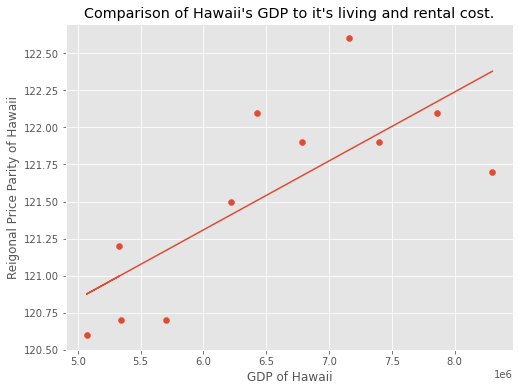

In [228]:
#Hawaii, NewYork, District of Columbia, California, New Jersey

#For Hawaii

states_Rpp = get_state_data(states = 'Hawaii')   #calling first function to get y variables 
state_GDP = get_state_GDP(states = 'Hawaii')      #calling first function to get x variables
get_corelation_value(state_GDP,states_Rpp)       #finding co-relation

# calling a function to see the co-relation (regression line) between CA regional price parity and CA GDP.
calc_regression(state_gdp=state_GDP, state_rpp = states_Rpp, states= 'Hawaii')

           state_RPP  state_GDP
state_RPP       1.00       0.62
state_GDP       0.62       1.00


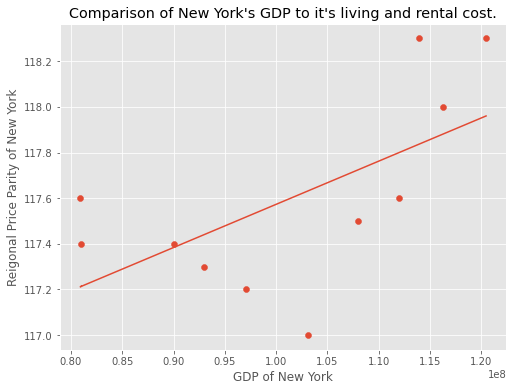

In [229]:
#For New York

states_Rpp = get_state_data(states = 'New York')        #calling first function to get y variables
state_GDP = get_state_GDP(states = 'New York')         #calling first function to get x variables
get_corelation_value(state_GDP,states_Rpp)            # finding corelation

# calling a function to see the co-relation (regression line) between CA regional price parity and CA GDP.
calc_regression(state_gdp=state_GDP, state_rpp = states_Rpp,states = 'New York')

           state_RPP  state_GDP
state_RPP       1.00      -0.53
state_GDP      -0.53       1.00


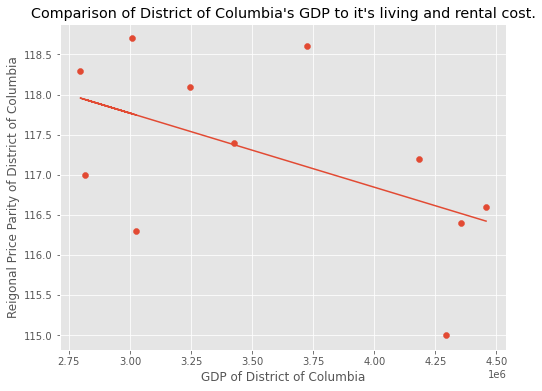

In [230]:
#For District of Columbia

states_Rpp = get_state_data(states = 'District of Columbia') #calling first function to get y variables
state_GDP = get_state_GDP(states = 'District of Columbia')     #calling first function to get x variables
get_corelation_value(state_GDP,states_Rpp)                     # finding corelation

# calling a function to see the co-relation (regression line) between CA regional price parity and CA GDP.
calc_regression(state_gdp=state_GDP, state_rpp = states_Rpp, states='District of Columbia')

           state_RPP  state_GDP
state_RPP       1.00       0.87
state_GDP       0.87       1.00


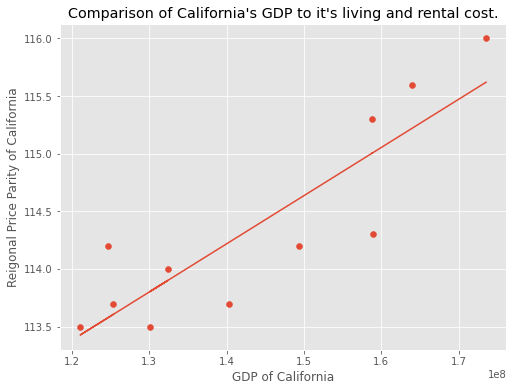

In [231]:

#For California

states_Rpp = get_state_data(states = 'California')       #calling first function to get y variables
state_GDP = get_state_GDP(states = 'California')           #calling first function to get x variables
get_corelation_value(state_GDP,states_Rpp)                   # finding corelation

# calling a function to see the co-relation (regression line) between CA regional price parity and CA GDP.
calc_regression(state_gdp=state_GDP, state_rpp = states_Rpp, states='California')

           state_RPP  state_GDP
state_RPP       1.00       0.37
state_GDP       0.37       1.00


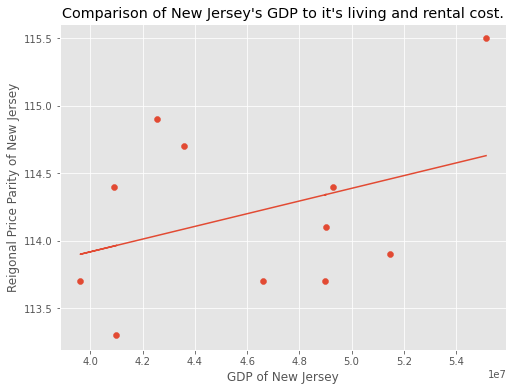

In [232]:

#For New Jersey

states_Rpp = get_state_data(states = 'New Jersey')           #calling first function to get y variables
state_GDP = get_state_GDP(states = 'New Jersey')               #calling first function to get x variables
get_corelation_value(state_GDP,states_Rpp)                  # finding corelation

# calling a function to see the co-relation (regression line) between CA regional price parity and CA GDP.
calc_regression(state_gdp=state_GDP, state_rpp = states_Rpp, states='New Jersey')

# Summary of Visualizations

1.a. Which state GDP on average has been increasing from 2009 to 2019? 

In [85]:

#using plotly to plot

fig = go.Figure(data=go.Choropleth( #using graph objects
    locations=GDP_state_df_change_Plot['state_name'], # Spatial coordinates
    z = GDP_state_df_change_Plot['Mean of %change-GDP'].astype(float), # Data to be color-coded
    locationmode= 'USA-states', # set of locations match entries in locations
    colorscale = 'Blues',
    colorbar_title = "% change in GDP",
    hoverinfo='location+z'
))

fig.update_layout(  #update figure's layout proporties 
    title_text = 'Average Change in US states GDP by State by all industries from 2009-2019 ',
    geo_scope='usa', # limite map scope to USA
    template='plotly_dark'
)

fig.show()


1.b. TOp 10 states with average change(increase) in GDP in all industries

In [86]:



#plotting top 20 states in average increase of GDP from 2009-2019
fig = px.bar(Top_20_states_df, y='Mean of %change-GDP', x='States', text='Mean of %change-GDP') #plotly bar function
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',title_text = 'top 20 states in average increase of GDP from 2009-2019 in all areas')
fig.show()






1.c. State Ranking of which state has highest gdp from all industries in 2019

In [87]:
#using plotly table feature to have data presented in tabular format
fig_tab = go.Figure(data=[go.Table(  #calls graph objects of plotly in tabular form
    header=dict(values=['Rank','States','Description','2019-GDP'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[all_state_2019.Rank,all_state_2019.States, all_state_2019.Description, all_state_2019['2019']],
               fill_color='lavender',
               align='left'))
])
fig_tab.update_layout(  #update figure's layout proporties 
    title_text = 'State Ranking by GDP from all industries in 2019 '
)

fig_tab.show()

1.d. What areas is contributing to that states GDP

In [90]:


# plotting data in plotly pie-chart

lab =top_industry_CA_lim['Description']
val = top_industry_CA_lim['2019']

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=lab, values=val, hole=.3)])

fig.update_layout(
    title_text="GDP generated in California according to areas",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='CA', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

#Real estate and rental leasing is top industry among other industries that contribute more.


2.a.Personal income by states in different years

In [92]:
# plotting "state_personal_income dataframe" using dash and plotly components
app = dash.Dash(__name__)   #setting the app variable
app.layout = html.Div([      #setting app layout using html components

    html.H1("Compare personal income in different states", style={'text-align': 'center'}),  #specifying header

    dcc.Dropdown(id="year",  #having dropdown menu
                 options=[
                     {"label": "2009", "value": '2009'},
                     {"label": "2010", "value": '2010'},
                     {"label": "2011", "value": '2011'},
                     {"label": "2012", "value": '2012'},
                     {"label": "2013", "value": '2013'},
                     {"label": "2014", "value": '2014'},
                     {"label": "2015", "value": '2015'},
                     {"label": "2016", "value": '2016'},
                     {"label": "2017", "value": '2017'},
                     {"label": "2018", "value": '2018'}],
                 multi=False,
                 value='2018',                   #setting default value 
                 style={'width': "40%"}
                 ),


    html.Div(id='out_field', children=[]),  #specifying dropdown container
    html.Br(),  #leaving a line in html

    dcc.Graph(id='state_map', figure={})  #calling graph 

])

# Connect the Plotly graphs with Dash Components
@app.callback(
    [Output(component_id='out_field', component_property='children'), #calling for output of container with user optin
     Output(component_id='state_map', component_property='figure')],  #calling for output of container with map
    [Input(component_id='year', component_property='value')]  #input call with year and respective values
)
def update_graph(user_yr):  #defining function to update graph using the user's input
    print(user_yr)
    print(type(user_yr))

    container = "you will see the data for: ".format(user_yr)
    
    df = state_personal_income_plot.sort_values(by=[user_yr], ascending=False) #makina new df according to user input
    df[user_yr] = df[user_yr].astype(float) #converting data type of user selected to float to make colorscale continuous
    print(df)
    

    # using Plotly Express
    
    
    fig = px.choropleth(
        data_frame=df,
        locationmode='USA-states',
        locations=df['code'],
        scope="usa",
        color= user_yr,
        hover_data=['States', user_yr],                           #setting the hover info
        color_continuous_scale=px.colors.sequential.Bluered,
        labels={user_yr: 'Personal income in billions'},           
        template="plotly_dark"                              #setting the theme
    )
    

    return container, fig      #this returns the value of output we needed
if __name__ == '__main__':
    app.run_server(port =9999)

Dash is running on http://127.0.0.1:9999/

Dash is running on http://127.0.0.1:9999/

Dash is running on http://127.0.0.1:9999/

Dash is running on http://127.0.0.1:9999/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:9999/ (Press CTRL+C to quit)


2.b.Income of states from Wages and Salaries

In [93]:



# looking for states with high wages and salaries
comp_wage_sal = compare_states(y=' Wages and salaries')
draw_plot(df = comp_wage_sal,a='2019',x='States',title = 'Top 10 states according to wages and salaries in ')




2.b.4 Income of states from Retail Trade

In [94]:


# calling function to compare income based on retail trade to other states
comp_retail_trade = compare_states(y= '   Retail trade',)
draw_plot(df = comp_retail_trade,a='2019',x='States',title = 'Top 10 states(income) based on retail trade in ')





2.b.5 Income of states from manufacturing

In [95]:


# calling function to compare income based on manufacturing to other states
comp_manufacturing = compare_states(y= '   Manufacturing')
draw_plot(df = comp_manufacturing,a='2019',x='States',title = 'Top 10 states(income) based on manufacturing trade in ')




2.b.6 Income of states from transportation and warehousing

In [96]:


# calling function to compare income based on transport to other states
comp_transp = compare_states(y= '   Transportation and warehousing')
draw_plot(df = comp_transp,a='2019',x='States',title = 'Top 10 states(income) based on based on transport in ')



2.b.7 Income of state from information area

In [97]:


# calling function to compare income based on information to other states
comp_info = compare_states(y= '   Information')
draw_plot(df = comp_info,a='2019',x='States',title = 'Top 10 states(income) based on based on information in ')



2.b.8 Income of state from real estate and leasing

In [98]:


# calling function to compare income based on real estate to other states
comp_real_estate = compare_states(y= '   Real estate and rental and leasing')
draw_plot(df = comp_real_estate,a='2019',x='States',title = 'Top 10 states(income) based on real estate and rental and leasing in ')



2.b.9 Income of state from accomodation and food services

In [99]:


# calling function to compare income based on food and accomodation to other states
comp_food = compare_states(y= '   Accommodation and food services')
draw_plot(df = comp_food,a='2019',x='States',title = 'Top 10 states(income) based on accomodation and food services in ')



2.b.10 Income of state from goernment expenditures

In [100]:


 #calling function to compare income based on government areas to other states
comp_gov = compare_states(y= '  Government and government enterprises')
draw_plot(df = comp_gov,a='2019',x='States',title = 'Top 10 states(income) based on governemnt and govenrmnet enterprises in ')


3.aCompares per capita expend and per capita income from different industries in US over the years

In [107]:
new_df_comp


#plotting scatter plot using plotly
col_1 = go.Scatter(                        #using plotly scatter to variable
    x =new_df_comp.index,
    y= new_df_comp.Per_capita_expend,
    mode ='lines+markers',                     #sets the type of lines and dots in the plot
    name ='Per_capita_expend'                    # sets the name of the line plot
)

col_2 = go.Scatter(                             #using plotly scatter to variable
    x = new_df_comp.index,
    y= new_df_comp.Per_capita_income,
    mode ='lines+markers',                     #sets the type of lines and dots in the plot
    name ='Per_capita_income'                   # sets the name of the line plot
)

graph_s = [col_1,col_2]            #making a list of these scatterplot variables
layout = go.Layout(                   #using plotly graph objects layout
   title='Comparison of per capita expend and per capita income of US by year',  #setting up the title
   xaxis=dict(
        title='Year'
   ),
   yaxis=dict(
       title='US dollars(thousands)'
   ),
)
fig = go.Figure(data=graph_s, layout=layout)            #calling for the scatter plot figure
plotly.offline.iplot(fig)  #using offline feature of plotly



3.b.

In [109]:

colors=['maroon', 'lightsalmon', 'aqua', 'aquamarine', 'greenyellow', 'mediumvioletred', 'bisque', 'lightpink', 'darkorange', 'blue']
a=list(top_spend_per_capita_df['spending_rate %'])

    
fig = go.Figure(data=[go.Bar(
    x=top_spend_per_capita_df['spending_rate %'],
    y=top_spend_per_capita_df['States'],
    hovertext=['spending_rate %', 'States'],
    orientation='h',
    text=a,
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig.update_layout(title_text='Top 10 states with highest spending rate in 2019.',
                  yaxis=dict(title='states',titlefont_size=16),
                 xaxis=dict(title='%change',titlefont_size=16))


fig.show()

3.c.

In [113]:
spend_state = state_patt(state='California', year ='2019')
print(spend_state)
spend_state = state_patt(state='New York', year ='2019')
print(spend_state)
spend_state = state_patt(state='South Dakota', year ='2019')
print(spend_state)
spend_state = state_patt(state='Hawaii', year ='2019')
print(spend_state)
spend_state = state_patt(state='Utah', year ='2019')
print(spend_state)
spend_state = state_patt(state='Texas', year ='2019')
print(spend_state)


                                                        States     2019
Description                                                            
   Housing and utilities                            California 10601.00
   Health care                                      California  8005.00
   Gross output of nonprofit institutions           California  5921.00
   Less: Receipts from sales of goods and servi...  California  4398.00
   Other services                                   California  4067.00
   Food services and accommodations                 California  3780.00
   Financial services and insurance                 California  3663.00
   Other nondurable goods                           California  3329.00
   Food and beverages purchased for off-premise...  California  3224.00
   Transportation services                          California  1976.00
   Recreation services                              California  1837.00
   Recreational goods and vehicles                  California  

In [114]:


final_df = one_df_ch.append(two_df_ch) #appending two dataframes to make it one
final_df

#plotting bar chart from plotly
fig = px.bar(final_df, x="States", y="Dollars spend", color="Description", barmode="group", facet_col="Year",
             category_orders={"States": ["California", "New York", "South Dakota"],
                              "Description": ['   Housing and utilities','   Financial services and insurance','   Health care'],
                              "Year": ["2019", "2009"]})
fig.show()


4.a. Compare living and rental cost by States 

In [130]:
# would like to plot choropleth so filtering dataframe accordingly

get_RPP = cost_state_metro_both.drop(['Area','States','Description'], axis =1) #dropping columns
get_RPP #print the dataframe

list_RPP=[]                      #setting list
for i in range(len(get_RPP)):     #using for loop to append the new list
    for c in range(11):
        get = get_RPP.iloc[i,c]
        list_RPP.append(get)      #appeding the empty new list

state_name=[]                      #setting list
g= list(cost_state_metro_both['States'])  #getting list of elements as column values
for s in g:
    for k in range(11):            #using for loop to append the new list
        s= s.strip()                  #removing unwanted spaces
        state_name.append(s)          #appeding the empty new list
        
n_yr=[]           #new empty list
year=['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018'] #list of strings with year values
for i in range(1,52):   #use for loop
    for y in year:
        n_yr.append(y)  #appending empty list

state_cd=[]     #empty list

#list of elements with abbrevaitions of state names and DC
state_abrev = ['HI', 'NY', 'DC', 'CA', 'NJ', 'MA', 'MD', 'WA', 'NH', 'CT', 'AK', 'VT', 'VA', 'CO', 'OR', 'ME', 'FL', 
               'MN', 'IL', 'RI', 'DE', 'PA', 'TX', 'NV', 'UT', 'AZ', 'GA', 'MT','ID', 'MI', 'WY', 'WI', 'NM', 'NC',
                'KS', 'SC','ND', 'NE', 'TN', 'IA', 'SD', 'LA', 'IN', 'OK', 'MO', 'KY', 'OH', 'WV', 'MS', 'AL', 'AR']
               
for state in state_abrev:  #using for loop to append the state names to empty list
    for k in range(11):
        state_cd.append(state)  #appending state names

In [131]:

new_df = pd.DataFrame(list(zip(state_name, state_cd, n_yr, list_RPP)), 
               columns =['States', 'state_cd','Year','RPP'])  #creating a new df with zip functionality

#use of dash components and plotly

app = dash.Dash(__name__)  #specifying app
app.layout = html.Div([  #calling app for html layout

    html.H1("Compare of living and rental cost", style={'text-align': 'center'}),  #specifying header in html

    dcc.Dropdown(id="slct_year",      #using dash to have dropdown option
                 options=[
                     {"label": "2008", "value": '2008'},
                     {"label": "2009", "value": '2009'},
                     {"label": "2010", "value": '2010'},
                     {"label": "2011", "value": '2011'},
                     {"label": "2012", "value": '2012'},
                     {"label": "2013", "value": '2013'},
                     {"label": "2014", "value": '2014'},
                     {"label": "2015", "value": '2015'},
                     {"label": "2016", "value": '2016'},
                     {"label": "2017", "value": '2017'},
                     {"label": "2018", "value": '2018'}],
                 multi=False,
                 value='2018',
                 style={'width': "40%"}
                 ),


    html.Div(id='out_field', children=[]),   #using html into dash
    html.Br(),

    dcc.Graph(id='state_map', figure={})  #calling graph to plot

])

# Connect the Plotly graphs with Dash Components
@app.callback(
    [Output(component_id='out_field', component_property='children'),   #one output that will show in dash
     Output(component_id='state_map', component_property='figure')],  #next output that will show in dash
    [Input(component_id='slct_year', component_property='value')]     #one input for dropdown option
)
def update_graph(option_slctd):    #calling for update to have option for dropdown option
    print(option_slctd)
    print(type(option_slctd))

    container = "you will see the data for: ".format(option_slctd)

    new_dff = new_df.copy()   #making a copy to new dataframe
    new_dff = new_dff[new_dff.Year == option_slctd]   #specifying new column

    # Plotly Express    
    fig = px.choropleth(   #using choropleth to cisualize maps
        data_frame=new_dff,
        locationmode='USA-states',
        locations=new_dff['state_cd'],
        scope="usa",
        color='RPP',
        hover_data=['States', 'RPP'],
        color_continuous_scale=px.colors.sequential.YlOrRd,
        labels={'RPP': 'ratio of living and rental cost by state'},
        template='plotly_dark'  #plots with dark theme
    )


    return container, fig

if __name__ == '__main__':        #calling main function to run app in port 4051; prints map in new tab
    app.run_server(port =4051)


Dash is running on http://127.0.0.1:4051/

Dash is running on http://127.0.0.1:4051/

Dash is running on http://127.0.0.1:4051/

Dash is running on http://127.0.0.1:4051/

Dash is running on http://127.0.0.1:4051/

Dash is running on http://127.0.0.1:4051/

Dash is running on http://127.0.0.1:4051/

Dash is running on http://127.0.0.1:4051/

Dash is running on http://127.0.0.1:4051/

Dash is running on http://127.0.0.1:4051/

Dash is running on http://127.0.0.1:4051/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:4051/ (Press CTRL+C to quit)
127.0.0.1 - - [07/Nov/2020 23:16:04] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Nov/2020 23:16:05] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [07/Nov/2020 23:16:05] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [07/Nov/2020 23:16:05] "POST /_dash-update-component HTTP/1.1" 200 -


2018
<class 'str'>


4.b. Comparison of living cost and rental cost in metropolitan area and nonmetropolitan area

In [234]:
#getting list of states names
state_name = list(cost_state_metro_both_state.States)
state_name

fig = go.Figure()   #using plotly graph objects
fig.add_trace(go.Scatter(       
    x=list(cost_state_metro_both_state[2018]),
    y=state_name,
    marker=dict(color="crimson", size=8),
    mode="markers",
    name="Metropolitan-area",
))

fig.add_trace(go.Scatter(
    x=list(cost_state_nonmetro_both_state[2018]),
    y=state_name,
    marker=dict(color="gold", size=8),
    mode="markers",
    name="Non-metropolitan area",
))

fig.update_layout(   #updating layout
    height = 1000,
    title="Living cost and rental cost disparity between metropolitan area and non-metropolitan area",
    xaxis_title="RPP (ratio)",
    yaxis_title="States")

fig.show()

5.a.Analysis of co-relation between state's GDP and it's living and rental cost

           state_RPP  state_GDP
state_RPP       1.00       0.37
state_GDP       0.37       1.00


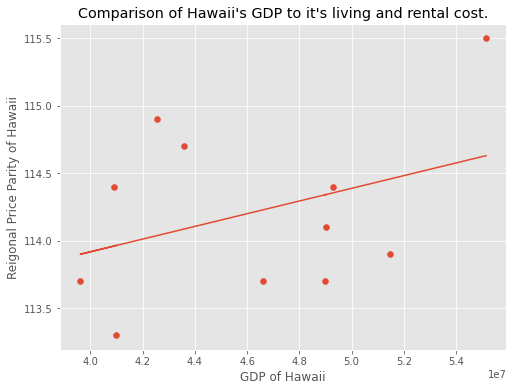

In [133]:
get_corelation_value(state_GDP,states_Rpp)       #finding co-relation
calc_regression(state_gdp=state_GDP, state_rpp = states_Rpp, states= 'Hawaii')

           state_RPP  state_GDP
state_RPP       1.00       0.37
state_GDP       0.37       1.00


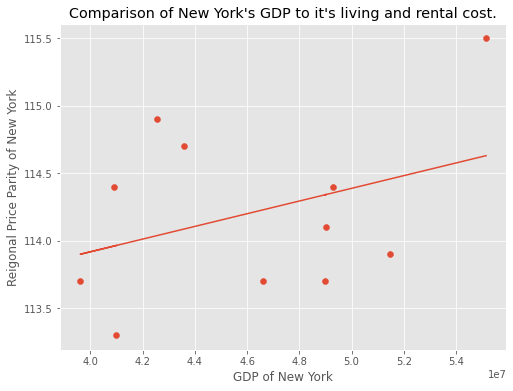

In [134]:
get_corelation_value(state_GDP,states_Rpp)       #finding co-relation
calc_regression(state_gdp=state_GDP, state_rpp = states_Rpp,states = 'New York')


           state_RPP  state_GDP
state_RPP       1.00       0.37
state_GDP       0.37       1.00


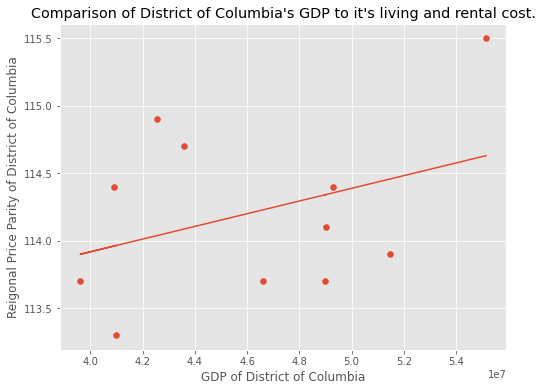

In [135]:
get_corelation_value(state_GDP,states_Rpp)       #finding co-relation

calc_regression(state_gdp=state_GDP, state_rpp = states_Rpp, states='District of Columbia')



           state_RPP  state_GDP
state_RPP       1.00       0.37
state_GDP       0.37       1.00


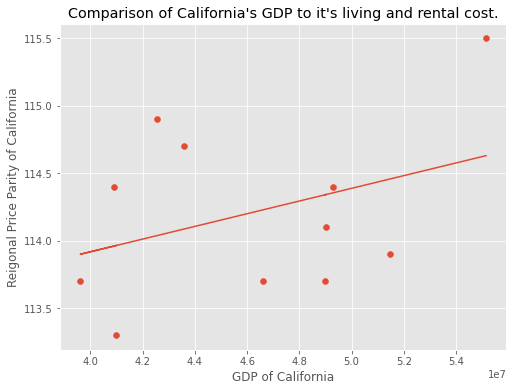

In [136]:
get_corelation_value(state_GDP,states_Rpp)       #finding co-relation

calc_regression(state_gdp=state_GDP, state_rpp = states_Rpp, states='California')

           state_RPP  state_GDP
state_RPP       1.00       0.37
state_GDP       0.37       1.00


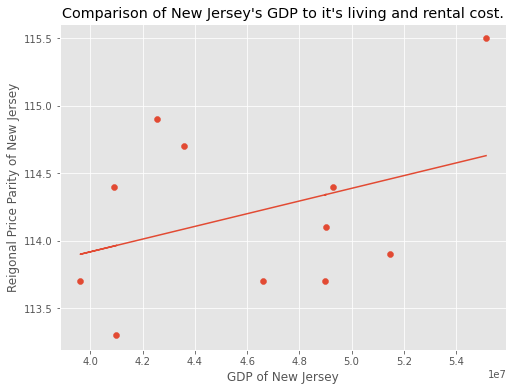

In [137]:
get_corelation_value(state_GDP,states_Rpp)       #finding co-relation

calc_regression(state_gdp=state_GDP, state_rpp = states_Rpp, states='New Jersey')

### Findings


 1. From all the analysis and visualizations, it was interesting to find that California has the highest GDP in 2019 and it's GDP major contribution comes from Real estate, rental and leasing area with 40.0% .This can indicate that businesses related to real estate must be in good position and there might be a good chance that many people are employed in Real estate, rental and leasing in California.
 
2.  We also came to know that over time the personal income has been increasing in all states and people are being able to bring more paycheck home in 2019 than in 2009. If we come for recent year (2019), CA has highest personal income, comparably with other states. While comparing the personal income in different areas like wages and salaries, manufacturing, transportation, government enterprises and so on, we can find the common pattern that California dominates all of the states in different areas. 
 
 
3. Moving on, the analysis of spending pattern is significant as it point out towards the inflation and as well as consumer spending pattern. While comparing spending pattern to income,it tells us out if people are able to save some money. Per capita expenditure is increasing in same pattern like the per capita income. From 2008 to 2018 and more, both per capita income and expenditure are increasing with same slope. This means that the amount of per person spending has been significantly increased. However, because of the parallel increase in per capita income, there does not seem to be adverse effect. And the gap between these lines are showing that each person have been saving some amount of money. This can help the policy makers to control the market price accordingly. I would like to see which state has increased their spending rate and by how much from 2008 to 2019. California people have increased their spending rate by 40%. In same way, even other states people are not that far away. This can lead to a point that though inflation have surged abundantly, increase in each person's people income in all these states have maintaine that difference. 
 
 
4. It also was known that Housing and utilities, health care and financial services and insurance are top priorities for all state residents to spend their dollars. That is why affordable health care and affordable health care is always the biggest question. we came to know that housing and utility seem to be top priority of many residents. Hawaii, California , Massachussets, DC and New York have highest RPP indicating they are the moest expensive place to live.It is interesting that California has the highest spending rate, more contributed by housing and rental utility, seems to have similar pattern with RPP. We can be convinced that, if we get job offer from California and Alaska with equal salaries and benefits (assuming all other facilites to be similar) and want cheaper place to live in, we have to go with job offer from Alaska and Alabama.


Finally, I would like to see if increase in GDP of that state will increase RPP of that state. Though California, Hawaii's GDP had positive realtion with their RPP, just the GDP of state might not be enough to co-relate with state's RPP. There might be other factors they come in play

### Lessons Learned and Conclusion



This project had brought some new challenges, and I learned more about data minning as well as visualization, most importantly dealing with larger complex sets of data.And for learning purpopses, I have tried to do the same thing in different ways, so that i could imporove my calibers. I am looking forward for my final project.

My github link is pasted here:

https://ujjoli.github.io/Individual-Project/


